# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.stats.weightstats as wstats

df = pd.read_csv('data/human_body_temperature.csv')


In [9]:
stats.norm.ppf(0.975)

1.959963984540054

<h1>CENTRAL LIMIT THEOREM</h1>
<h3>For independent random variables
<p>
<ul>
    <li>
<b>
   For any given Distribution, sampling distribution of sample means will be normally distributed (as n gets larger)
</b>
</li><br>
<li>
<b>
   Mean of the sampling distribution of sample means will be equal to mean of original distribution
</b>
</li>
    <br>
    <li>
<b>
   Standard Deviation of sampling distribution of sample mean will be equal to <br>
    (Std. Deviation of original distribution)/ SQRT(Sample Size)
</b>
</li>
    <br>
</ul>
</p></h3>

<h1>Q1: Is the distribution of body temperatures normal?</h1>

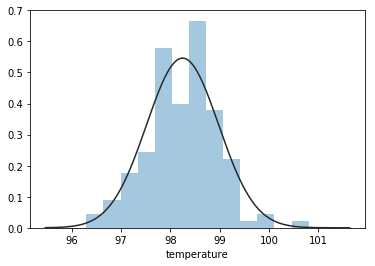

In [2]:
sns.distplot(df['temperature'],kde=False, fit=stats.gamma);
plt.show()


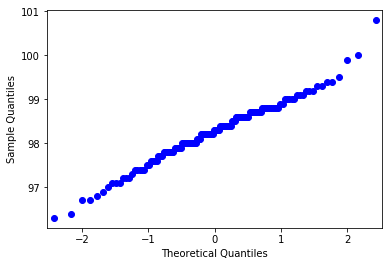

In [3]:
from statsmodels.graphics.gofplots import qqplot
qqplot(np.array(df['temperature']))
plt.show()


In [4]:
from scipy import stats
# Null Hypothesis is the distribution of temeratures is Normal distribution
def normalityTest(temperatures):
    k2, p = stats.normaltest(temperatures)

    alpha = 1e-3
    print("p = {:g}".format(p))
    
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected - distribution is Not Normal")
    else:
        print("The null hypothesis cannot be rejected - distribution is Normal")
        

In [5]:
normalityTest(df['temperature'])


p = 0.258748
The null hypothesis cannot be rejected - distribution is Normal


<h3>
<ul>
<li><b>Based on the Histograms, QQ Plot and other tests we can conclude, the distribution is Normal </b>
    
    </ul></h3>

<h1>Q2 : Is the sample size large? Are the observations independent?</h1>
<h3>
<ul>
<li>
<b>
    Sample Size for this Exercise is large , sample size greater than 30 is considered large.
</b>
</li>
    <br>
    <li>
<b>
    Observations are independent
</b>
</li>
    <br>
<li>
<b>One-sample test is applicable in this case. A two-sample t-test is applied to compare whether the average difference between two groups is really significant or if it is just a random chance.</b>
</li>
</ul>
</p></h3>

<h1>Q3 : Is the true population mean really 98.6 degrees F?</h1>

<div><h2>
Hypothesisis 
<ul>
<li>Ho = mean temperature is 98.6
<li>Ha = mean temperature is not equal to 98.6 , may be greater than or less than 98.6
</ul>
    </h2>
</div>

In [6]:
#Hypothesisis Test 
#h0 = mean temperature is 98.6
#ha = mean temperature is not equal to 98.6 , may be greater than or less than 98.6

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

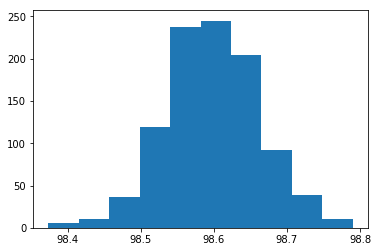

p for hypothesis tests = 0.001
The null hypothesis can be rejected - mean temerature is not 98.6


In [7]:
temperatures = df['temperature']
translated = temperatures-np.mean(temperatures)+98.6
bs_diff_replicates = draw_bs_reps(translated,np.mean,1000)
plt.hist(bs_diff_replicates)
plt.show()
val = np.sum(bs_diff_replicates == 98.6)
p = np.float(val)/1000
print("p for hypothesis tests = {:g}".format(p))
alpha = 0.05
if p < alpha: 
    print("The null hypothesis can be rejected - mean temerature is not 98.6")
else:
    print("The null hypothesis cannot be rejected - mean temerature is 98.6")

In [8]:
# t-test X-Mu/(s/Sqrt(n))
# z-test X-Mu/(s/sqrt(n)) or X-Mu/row
def frequentisttest(temperature):
    diff_mean = 98.6 - np.mean(temperature)
    s = np.std(temperature)
    n = len(temperature)
    sqrt_n = np.sqrt(n)
    val = diff_mean/(s/sqrt_n)
    t_val = stats.t.sf(np.abs(val), n-1)*2 # t score , 2 tailed as the alternative hypothesis is a "Not equals to"
    z_val = stats.norm.sf(abs(val))*2 # z score
    print("p value for t test = {:g}".format(t_val))
    print("p value for z test = {:g}".format(z_val))

In [9]:
# calculated t-test and z-test
frequentisttest(df['temperature'])


p value for t test = 2.18875e-07
p value for z test = 4.35232e-08


In [10]:
# library provided - t-test
z,p = stats.ttest_1samp(df['temperature'],98.6)
print("p value for t test = {:g}".format(p))
# library provided -  z-test
z,p = wstats.ztest(df['temperature'],value=98.6,usevar='pooled',ddof=1.0)
print("p value for z test = {:g}".format(p))

p value for t test = 2.41063e-07
p value for z test = 4.90216e-08


<h3><p><b>
    <ul>
    <li>As sample size is large z-test is appropriate</li>
    <li>The null hypothesis can be rejected as p value is less than alpha (0.05) (i.e mean temerature is not 98.6)</li>
        <li><b>The P values are higher for t-test , p values differ as t and z distributions are different</b></li>
    </ul></b></p></h3>

<h1>Q4 : Draw a small sample of size 10 from the data and repeat both frequentist tests.</h1>

In [11]:
temperatures = np.random.choice(df['temperature'], size = 10)
# python t-test
t,p1 = stats.ttest_1samp(temperatures,98.6)
print("p value for t-test = {:g}".format(p1))
# python z-test
z,p2 = wstats.ztest(temperatures,value=98.6,usevar='pooled',ddof=1.0)
print("p value for z-test = {:g}".format(p2))


p value for t-test = 0.821354
p value for z-test = 0.816153


In [12]:
temperatures = np.random.choice(df['temperature'], size = 10)
frequentisttest(temperatures)

p value for t test = 0.0125822
p value for z test = 0.0018908


<h3><ul>
    <li><b>As the sample size is small (i.e 10), t-test will be appropriate</b></li>
    <li><b>The Hypothesis cannot be rejected as the p value is greater than 0.05</b></li>
<li><b>Increasing the sample size will tend to result in a smaller P-value only if the null hypothesis is false.</b></li>
    <li><b>The P values are higher for t-test , p values differ as t and z distributions are different</b></li>
</ul></h3>

<h1>Q5 : At what temperature should we consider someone's temperature to be "abnormal"?</h1>

In [13]:
# bootstrap approach
# 95 % confidence level & 2 tailed test
temperatures = df['temperature']
bs_diff_replicates = draw_bs_reps(temperatures,np.mean,1000)
np.percentile(bs_diff_replicates, [2.5, 97.5])


array([98.12382692, 98.37155769])

In [14]:
# calculation approach
# 95 % confidence level & 2 tailed test
z_criticalvalue = stats.norm.ppf(0.975)
#t_criticalvalue = stats.t.ppf(0.975,len(df['temperature'])-1)
# standard error = std/sqrt(sample size)
se = np.std(df['temperature'])/np.sqrt(len(df['temperature']))

me = z_criticalvalue * se

# confidence interval for 95%
print("c.i value for z-test = {:s}".format([np.mean(df['temperature'])-me,np.mean(df['temperature'])+me]))


c.i value for z-test = [98.12368211145665, 98.37477942700491]


<h3><ul>
<li><b>Temperatures within confidence interval i.e.[98.12, 98.37] are considered normal</b></li>
</ul></h3>

<h1>Q6 : Is there a significant difference between males and females in normal temperature?</h2>

<div><h2>
Hypothesisis 
<ul>
<li>Ho = There is no significant difference between male and female temperatures 
<li>Ha = There is a significant difference 
</ul>
    </h2>
</div>

In [15]:
# Hypothesis approach
male_df = df[df['gender']=='M']
female_df = df[df['gender']=='F']

combined_mean = np.mean(df['temperature'])

male_df_shifted = male_df['temperature'] - np.mean(male_df['temperature'])+combined_mean

female_df_shifted = female_df['temperature'] - np.mean(female_df['temperature'])+combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_male = draw_bs_reps(male_df_shifted,np.mean,10000)
bs_replicates_female = draw_bs_reps(female_df_shifted,np.mean,10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_female-bs_replicates_male

# Compute the p-value
mean_diff = np.abs(np.mean(male_df['temperature']) - np.mean(female_df['temperature']))
#print('mean diff : ',mean_diff,', bs_diff_replicates : ',bs_diff_replicates)
p = np.sum(bs_diff_replicates > mean_diff)*1.0 / len(bs_diff_replicates)

# Print p-value
alpha = 0.05
if p < alpha: 
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
    

The null hypothesis can be rejected


In [16]:
#Frequentist approach
male_var = np.var(male_df['temperature'])

female_var = np.var(female_df['temperature'])

denominator = np.sqrt(male_var/len(male_df['temperature']) + female_var/len(female_df['temperature']))
n = len(df['temperature'])
val = mean_diff/denominator
#t_val = stats.t.sf(np.abs(val), n-1)*2 
z_val = stats.norm.sf(abs(val))*2 # 2 tailed as the alternative hypothesis is a "Not equals to"

alpha = 0.05
    
if z_val < alpha: 
    print("The null hypothesis can be rejected with z test")
else:
    print("The null hypothesis cannot be rejected with z test")


The null hypothesis can be rejected with z test


<h3><ul>
    <li><b>Null Hypothesis can be rejected as there is a significant difference between male and female temperatures</b>
        <b></h3>

<h1>Conclusion</h1>
<h3>
<ul>
    <li><b>The general understanding as stated in the problem that 98.6 to be mean temerpature of Human body is proved to be wrong with our tests</b>
    <li><b>Normal Temerature lies between 98.12 and 98.37 degrees F</b>
        <li><b>Tests results vary with sample size</b>
    <li><b>Body Temperatures of male and female are significantly different
        </h3>